# Chapter 4 - Programming Exercises

### [Link](https://runestone.academy/runestone/books/published/pythonds3/BasicDS/Exercises.html)

### 1. Modify the infix-to-postfix algorithm so that it can handle errors.

We have to see what are errors in the context of this algorithm. It turns out this list can present some common errors:
* The number of open parentheses must equal the number of closed parentheses.
* The token is something else than the ones accepted for the function (`"ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789()+-/*"`).

In [2]:
from pythonds3.basic import Stack

def infix_to_postfix(infix_expr):
    if infix_expr.count("(") != infix_expr.count(")"):
        print(f"Error! Closed parentheses (n = {infix_expr.count('(')}) don't match open parentheses (n = {infix_expr.count(')')})!")
        return 
    
    prec = {}
    prec["*"] = 3
    prec["/"] = 3
    prec["+"] = 2
    prec["-"] = 2
    prec["("] = 1
    op_stack = Stack()
    postfix_list = []
    token_list = infix_expr.split()

    for token in token_list:
        if token not in "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789()+-/*":
            print(f"Error, token {token} not recognized!")
        elif token in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" or token in "0123456789":
            postfix_list.append(token)
        elif token == "(":
            op_stack.push(token)
        elif token == ")":
            top_token = op_stack.pop()
            while top_token != "(":
                postfix_list.append(top_token)
                top_token = op_stack.pop()
        else:
            while (not op_stack.is_empty()) and (prec[op_stack.peek()] >= prec[token]):
                postfix_list.append(op_stack.pop())
            op_stack.push(token)

    while not op_stack.is_empty():
        postfix_list.append(op_stack.pop())

    return " ".join(postfix_list)

### 2. Modify the postfix evaluation algorithm so that it can handle errors.

I can see that we have to add an exception when we are diving by zero. I decided to still return infinity.

In [3]:
import math

def postfix_eval(postfix_expr):
    operand_stack = Stack()
    token_list = postfix_expr.split()

    for token in token_list:
        if token in "0123456789":
            operand_stack.push(int(token))
        else:
            operand2 = operand_stack.pop()
            operand1 = operand_stack.pop()
            result = do_math(token, operand1, operand2)
            operand_stack.push(result)
    return operand_stack.pop()


def do_math(op, op1, op2):
    if op == "*":
        return op1 * op2
    elif op == "/":
        try:
            result = op1 / op2
        except ZeroDivisionError:
            print(f"Division by 0 will give an infinite number!")
            result = op1 * math.inf
        finally:
            return result
    elif op == "+":
        return op1 + op2
    elif op == "-":
        return op1 - op2
    elif op == "^":
        return op1 ** op2
    else:
        print(f"Not a valid operation ({op})! Returning NaN.")
        return math.nan

### 3. Implement a direct infix evaluator that combines the functionality of infix-to-postfix conversion and the postfix evaluation algorithm. Your evaluator should process infix tokens from left to right and use two stacks, one for operators and one for operands, to perform the evaluation.

Both the modules already defined can be chained to produce a direct infix evaluator, but since we are operating with numbers, we have to modify it so that only numbers are accepted. As bonus point, I will add, as asked during the chapter, the ** (power) operator.

In [4]:
def direct_infix_evaluator(infix_expr):
    if infix_expr.count("(") != infix_expr.count(")"):
        print(f"Error! Closed parentheses (n = {infix_expr.count('(')}) don't match open parentheses (n = {infix_expr.count(')')})!")
        return 
    
    prec = {}
    prec["*"] = 4
    prec["/"] = 4
    prec["+"] = 3
    prec["-"] = 3
    prec["^"] = 2
    prec["("] = 1
    op_stack = Stack()
    operand_stack = Stack()
    postfix_list = []
    token_list = infix_expr.replace("**", "^").split()

    for token in token_list:
        if (not token.isnumeric()) and (token not in "()+-/*^"):
            print(f"Error, token {token} not recognized!")
        elif token.isnumeric():
            postfix_list.append(token)
        elif token == "(":
            op_stack.push(token)
        elif token == ")":
            top_token = op_stack.pop()
            while top_token != "(":
                postfix_list.append(top_token)
                top_token = op_stack.pop()
        else:
            while (not op_stack.is_empty()) and (prec[op_stack.peek()] >= prec[token]):
                postfix_list.append(op_stack.pop())
            op_stack.push(token)

    while not op_stack.is_empty():
        postfix_list.append(op_stack.pop())

    postfix_expr = " ".join(postfix_list)
    token_list = postfix_expr.split()

    for token in token_list:
        if token in "0123456789":
            operand_stack.push(int(token))
        else:
            operand2 = operand_stack.pop()
            operand1 = operand_stack.pop()
            result = do_math(token, operand1, operand2)
            operand_stack.push(result)
            
    return operand_stack.pop()


Let's now run it with different expressions.

In [5]:
print(direct_infix_evaluator("5 * 3 ** ( 4 - 2 )"))
print(direct_infix_evaluator("( ( 3 + 2 ) * ( 6 * ( 1 - 5 ** 3 ) ) )"))

225
-1920


It seems it's working!

### 4. Turn your direct infix evaluator from the previous problem into a calculator.

In [6]:
def calc_simulation():
    expr = input("Enter an expression (q to quit): ")
    while expr != "q":
        print(f"Result is {direct_infix_evaluator(expr)}.")
        expr = input("Enter another expression (q to quit): ")
    print(f"See ya!")
        

### 5. Implement the `Queue` ADT, using a list such that the rear of the queue is at the end of the list.

In [7]:
class QueueRear:
    def __init__(self):
        self._items = []

    def enqueue(self, item):
        self._items.append(item)

    def dequeue(self):
        self._items.pop(0)

### 6. Design and implement an experiment to do benchmark comparisons of the two queue implementations. What can you learn from such an experiment?

It's easy to convince yourself that in this implementation, the enqueue operation becomes $O(1)$ while the dequeue operation becomes $O(n)$.

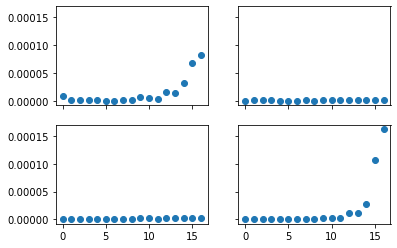

In [8]:
import time

from pythonds3.basic import Queue

import numpy as np 
import matplotlib.pyplot as plt

im1_times_enq = []
im2_times_enq = []
im1_times_deq = []
im2_times_deq = []

im1 = Queue()
im2 = QueueRear()

BASE = 2
MAX_EXP = 16

sizes = [BASE ** i for i in range(MAX_EXP + 1)]

for size in sizes:
    for n in np.arange(size):
        im1.enqueue(n)
        im2.enqueue(n)

    es1 = time.time()
    im1.enqueue(n + 1)
    ee1 = time.time()
    im1_times_enq.append(ee1 - es1)

    es2 = time.time()
    im2.enqueue(n + 1)
    ee2 = time.time()
    im2_times_enq.append(ee2 - es2)
    
    ds1 = time.time()
    i = im1.dequeue()
    de1 = time.time()
    im1_times_deq.append(de1 - ds1)

    ds2 = time.time()
    i = im2.dequeue()
    de2 = time.time()
    im2_times_deq.append(de2 - ds2)

im1_times_enq = np.array(im1_times_enq)
im2_times_enq = np.array(im2_times_enq)
im1_times_deq = np.array(im1_times_deq)
im2_times_deq = np.array(im2_times_deq)

x = np.arange(MAX_EXP + 1)
ys = [im1_times_enq, im2_times_enq, im1_times_deq, im2_times_deq]

fig, axs = plt.subplots(2, 2, sharex="all", sharey="all")

axs[0, 0].scatter(x, ys[0])
axs[0, 1].scatter(x, ys[1])
axs[1, 0].scatter(x, ys[2])
axs[1, 1].scatter(x, ys[3])

We see what we stated at the beginning: for `enqueue()` the first implementation is of linear complexity while `dequeue()` is constant. For the second implementation we have the opposite facts as we switched the implementation.

### 7. It is possible to implement a queue such that both enqueue and dequeue have 𝑂(1) performance on average. In this case it means that most of the time enqueue and dequeue will be 𝑂(1) except in one particular circumstance where dequeue will be 𝑂(𝑛). Create an implementation of a queue that would have an average performance of 𝑂(1) for enqueue and dequeue operations.

This has to be revised, but one thing is to use a list which keeps track of the last index we dequeued (so the dequeue using by indexing). In this way, both operations are $O(1)$. Since this list can potentially become very large, once the `head_index` reaches the last item, we refresh the list and the index itself.

In [9]:
class ConstantTimeQueue:
    def __init__(self):
        self.queue = []
        self.head_index = 0
        self.size = 0

    def enqueue(self, item):
        self.queue.append(item)
        self.size += 1

    def dequeue(self):
        if self.head_index >= self.size:
            print("Nothing to dequeue!")
        elif self.head_index == self.size - 1:
            item = self.queue[self.head_index]
            self.queue = []
            self.size = 0
            self.head_index = 0
            return item 
        else:
            item = self.queue[self.head_index]
            self.head_index += 1
            return item
        

### 8. Consider a real life situation. Formulate a question and then design a simulation that can help to answer it. Possible situations include:

* ### Cars lined up at a car wash
* ### Customers at a grocery store check-out
* ### Airplanes taking off and landing on a runway
* ### A bank teller

### Be sure to state any assumptions that you make and provide any probabilistic data that must be considered as part of the scenario.

* For the car wash scenario, I would simulate car waiting their turns in a first come first served fashion: a __Queue__ is a suitable data structure.
* Same as above, since users arrive in line, without any other complex assumption to make regarding the problem.
* Here we have to consider the departure and arrival times which are different for each flight: we use this time to create a "priority" for each flight asking to take off/land, two queues are necessary, and they are dequeued in order of priority.
* In the front desk, a bank teller would theoretically treat customers in a first come first served fashion, but since new banks have dedicated priority for _premium_ customers, we might use here a priority solution as well, which for every 1 standard customer, it processes 3 premium customers (if any of course).

Let's translate these formulations to code.

In [10]:
import random
import time
import string

from pythonds3 import Queue

class CarWash:
    def __init__(self):
        self.waiting_queue = Queue()

    def simulate(self, n_epochs=300, time_to_clean=3):
        epochs = 0
        entered = 0
        served = 0
        
        while epochs < n_epochs:
            appear = bool(epochs + random.randint(0, int(time.time())) % 2)
            if appear:
                car_plate = "".join(random.choices(string.ascii_uppercase + string.digits, k=10))
                print(f"Car {car_plate} appeared in queue!")
                self.waiting_queue.enqueue(car_plate)
                entered += 0
            
            if epochs % time_to_clean == 0 and (not self.waiting_queue.is_empty()):
                print(f"Car {self.waiting_queue.dequeue()} served!")
                served += 1

            epochs += 1
        
        return entered, served

class CheckoutCart:
    def __init__(self):
        self.waiting_line = Queue()

    def simulate(self, n_epochs=300, max_size_cart=5, time_per_item=1):
        epochs = 0
        entered = 0
        served = 0
        
        time_left_last_customer = 0
        last_customer = -1
        
        while epochs < n_epochs:
            appear = random.randint(0, int(time.time())) % 2 == 0
            if appear:
                cart_size = random.randint(1, max_size_cart)
                print(f"Customer no. {entered + 1} got in line with {cart_size}!")
                self.waiting_line.enqueue((entered + 1, cart_size))
                entered += 1
            
            if time_left_last_customer > 0:
                print(f"Still checking out customer {last_customer}!")
                time_left_last_customer -= 1
                if time_left_last_customer == 0:
                    print(f"Served customer {last_customer}! Total customers served: {served + 1}")
                    served += 1
            elif time_left_last_customer == 0 and (not self.waiting_line.is_empty()):
                c_number, c_cart_size = self.waiting_line.dequeue()
                time_left_last_customer = time_per_item * c_cart_size
                last_customer = c_number
                print(f"Serving customer {c_number} with cart size {c_cart_size} (taking {time_left_last_customer} epochs)!")
            else:
                print(f"Empty line!")
            
            epochs += 1
        
        return entered, served

class AirportRunaway:
    def __init__(self):
        self.departures = Queue()
        self.landings = Queue()

    def assign_priority(self, timestamp):
        return 10 ** 10 / int(timestamp)

    def simulate(self, n_epochs=300):
        epochs = 0

        while epochs < n_epochs:
            appear = random.randint(0, int(time.time())) % 2 == 0
            if appear:
                timestamp = time.time()
                operation = "departure" if random.randint(0, int(timestamp)) % 2 == 0 else "landing"
                flight_code = "".join(random.choices(string.ascii_uppercase + string.digits, k=8))
                priority = self.assign_priority(timestamp) 
                flight_dictionary = {"time": timestamp, "operation": operation, "flight_code": flight_code, "priority": priority}
                print(f"Flight no. {flight_code} in {operation} with priority {priority}!")
                if operation == "departure":
                    self.departures.enqueue(flight_dictionary)
                else:
                    self.landings.enqueue(flight_dictionary)

            
            next_departure = self.departures.dequeue() if not self.departures.is_empty() else None
            next_landing = self.landings.dequeue() if not self.landings.is_empty() else None
            ls = [next_departure, next_landing]

            if None not in ls:
                if next_landing["priority"] >= next_departure["priority"]:
                    print(f"Serving {next_landing['flight_code']} {next_landing['operation']}!")
                    print(f"Serving {next_departure['flight_code']} {next_departure['operation']}!")
                else:
                    print(f"Serving {next_departure['flight_code']} {next_departure['operation']}!")
                    print(f"Serving {next_landing['flight_code']} {next_landing['operation']}!")

            epochs += 1

class BankTeller:
    def __init__(self):
        self.standard_line = Queue()
        self.priority_line = Queue()

    def simulate(self, n_epochs=300):
        epochs = 0
        arrived = 0
        served = 0
        client_in_process = None
        next_end = -1
        next_clients = Queue()

        while epochs < n_epochs:
            appear = random.randint(0, int(time.time())) % 2 == 0
            if appear:
                is_standard = random.randint(0, 3) != 0
                if is_standard:
                    print(f"Client {arrived + 1} arrived (normal priority)!")
                    start = epochs
                    process_time = random.randint(0, n_epochs // (epochs + 1))
                    client = {"n": arrived + 1, "process_time": process_time}
                    self.standard_line.enqueue(client)
                else:
                    print(f"Client {arrived + 1} arrived (premium priority)!")
                    start = epochs
                    process_time = random.randint(0, n_epochs // (epochs + 1))
                    client = {"n": arrived + 1, "process_time": process_time}
                    self.priority_line.enqueue(client)
                
                arrived += 1

            for _ in range(3):
                if not self.priority_line.is_empty():
                    next_clients.enqueue(self.priority_line.dequeue())

            if not self.standard_line.is_empty():
                next_clients.enqueue(self.standard_line.dequeue())

            if client_in_process is None and (not next_clients.is_empty()):
                client_in_process = next_clients.dequeue()
                print(f"Now serving customer {client_in_process['n']}!")
                next_end = epochs + client_in_process["process_time"]

            if next_end == epochs:
                print(f"Served customer {client_in_process['n']}!")
                client_in_process = None 
                next_end = -1
            else:
                print(f"Still serving customer {client_in_process['n']}!")

            epochs += 1    
    

They're not realistic simulations but the idea is clear on how to handle different situations where we have a normal and pure first come first served approach and those particular situations where we need to work with priorities.

### 9. Modify the Hot Potato simulation to allow for a randomly chosen counting value so that each pass is not predictable from the previous one.

The random count `n` will be between 1 and the previously defined `num`.

In [11]:
def hot_potato(name_list, num):
    sim_queue = Queue()
    for name in name_list:
        sim_queue.enqueue(name)

    while sim_queue.size() > 1:
        n = random.randint(1, num)
        for i in range(n):
            sim_queue.enqueue(sim_queue.dequeue())

        sim_queue.dequeue()

    return sim_queue.dequeue()
    

### 10. Implement a radix sorting machine. A radix sort for base 10 integers is a mechanical sorting technique that utilizes a collection of bins, one main bin and 10 digit bins. Each bin acts like a queue and maintains its values in the order that they arrive. The algorithm begins by placing each number in the main bin. Then it considers each value digit by digit. The first value is removed and placed in a digit bin corresponding to the digit being considered. For example, if the ones digit is being considered, 534 is placed in digit bin 4 and 667 is placed in digit bin 7. Once all the values are placed in the corresponding digit bins, the values are collected from bin 0 to bin 9 and placed back in the main bin. The process continues with the tens digit, the hundreds, and so on. After the last digit is processed, the main bin contains the values in order.

In [12]:
def radix_sort_machine(a):
    bins = [Queue() for _ in range(11)]
    ret_a = []

    for n in a:
        bins[0].enqueue(n)

    for i in range(1, 10):
        for _ in range(len(a)):
            val = bins[0].dequeue()
            index = int(str(val)[-i]) if val >= 10 ** (i - 1) else 0
            bins[index].enqueue(val)

        for j in range(1, 10):
            while not bins[j].is_empty():
                bins[0].enqueue(bins[j].dequeue())

    while not bins[0].is_empty():
        ret_a.append(bins[0].dequeue())

    return ret_a


And now let's test it.

In [13]:
TIMES = 5
LEN = 10
MAX_EXP = 5

arrays = [[random.randint(0, 10 ** MAX_EXP) for _ in range(LEN)] for _ in range(TIMES)]
for a in arrays:
    print(f"Sorting array {a}. Result is {radix_sort_machine(a)}!")

Sorting array [2124, 39001, 30819, 87287, 22937, 89315, 49794, 49931, 40897, 41799]. Result is [2124, 22937, 30819, 39001, 40897, 41799, 49794, 49931, 87287, 89315]!
Sorting array [67254, 29573, 75028, 34309, 96081, 86780, 34000, 15509, 86530, 17942]. Result is [15509, 17942, 29573, 34000, 34309, 67254, 75028, 86530, 86780, 96081]!
Sorting array [73840, 82591, 13800, 41, 6037, 45705, 16965, 4952, 90337, 76748]. Result is [41, 4952, 6037, 13800, 16965, 45705, 73840, 76748, 82591, 90337]!
Sorting array [86951, 70655, 96432, 22831, 56360, 25645, 60308, 82392, 77864, 32686]. Result is [22831, 25645, 32686, 56360, 60308, 70655, 77864, 82392, 86951, 96432]!
Sorting array [2608, 6770, 15439, 59933, 12220, 47114, 53996, 2020, 62700, 46828]. Result is [2020, 2608, 6770, 12220, 15439, 46828, 47114, 53996, 59933, 62700]!


It looks like it works!

### 11. Another example of the parentheses matching problem comes from hypertext markup language (HTML). In HTML, tags exist in both opening and closing forms and must be balanced to properly describe a web document. This very simple HTML document:

```
<html>
   <head>
      <title>
         Example
      </title>
   </head>

   <body>
      <h1>Hello, world</h1>
   </body>
</html>
```
### is intended only to show the matching and nesting structure for tags in the language. Write a program that can check an HTML document for proper opening and closing tags.

The basic idea is simple: we set up a stack to hold all the opening tag. Each time we see a closing tag, we peek into the stack and if inside we have the corresponding opening tag on top, we pop it and continue. Otherwise, we return false since we know all the opening tags will be found in order inside the stack. Other checks are made, but this program can be expanded to handle for example those tags which come without closing tag (and end with "/>").

In [14]:
import re

def html_check(html_file):
    tag_stack = Stack()
    
    with open(html_file) as f:
        content = f.read().replace("\n", "").replace(" ", "")
        
    opening_bracket_count = content.count("<")
    closing_bracket_count = content.count(">")

    if opening_bracket_count != closing_bracket_count:
        return False

    tags = re.findall(r"(<.*?>)", content)
    for tag in tags:
        if tag[1] == "/":
            o_tag = tag[0] + tag[2:]
            if (not tag_stack.is_empty()) and tag_stack.peek() == o_tag:
                _ = tag_stack.pop()
            else:
                return False
        else:
            tag_stack.push(tag)
    
    return tag_stack.is_empty()

Let's test it.

In [15]:
html_check("ex.html")

True

### 12. Extend the program from Listing 2.15 to handle palindromes with spaces. For example, I PREFER PI is a palindrome that reads the same forward and backward if you ignore the blank characters.

It only takes to remove all the possible blanks in the string and then we are done.

In [18]:
from pythonds3.basic import Deque

def pal_checker(a_string):
    char_deque = Deque()
    stripped_string = a_string.replace(" ", "")

    for ch in stripped_string:
        char_deque.add_rear(ch)

    while char_deque.size() > 1:
        first = char_deque.remove_front()
        last = char_deque.remove_rear()
        if first != last:
            return False

    return True

Let's test it.

In [19]:
pal_checker("I PREFER PI")

True

### 13. To implement the `size` method, we counted the number of nodes in the list. An alternative strategy would be to store the number of nodes in the list as an additional piece of data in the head of the list. Modify the `UnorderedList` class to include this information and rewrite the `size` method.

We just have to add the `_size` attribute that gets increased or decreased at each addition or removal of an item. The `size()` method will return this attribute instead of counting the number of elements each time.

In [21]:
class Node:
    """A node of a linked list"""

    def __init__(self, node_data):
        self._data = node_data
        self._next = None

    def get_data(self):
        """Get node data"""
        return self._data

    def set_data(self, node_data):
        """Set node data"""
        self._data = node_data

    data = property(get_data, set_data)

    def get_next(self):
        """Get next node"""
        return self._next

    def set_next(self, node_next):
        """Set next node"""
        self._next = node_next

    next = property(get_next, set_next)

    def __str__(self):
        """String"""
        return str(self._data)


class UnorderedList:
    def __init__(self):
        self.head = None
        self._size = 0

    def is_empty(self):
        return self.head == None

    def add(self, item):
        temp = Node(item)
        temp.set_next(self.head)
        self.head = temp
        self._size += 1

    def size(self):
        return self._size

    def search(self, item):
        current = self.head
        while current is not None:
            if current.data == item:
                return True
            current = current.next

        return False

    def remove(self, item):
        current = self.head
        previous = None

        while current is not None:
            if current.data == item:
                break
            previous = current
            current = current.next

        if current is None:
            raise ValueError("{} is not in the list".format(item))
        if previous is None:
            self.head = current.next
        else:
            previous.next = current.next

        self._size -= 1

    def append(self, item):
        current = self.head 
        temp = Node(item)

        while current.next is not None:
            continue 

        current.set_next(temp)
        self._size += 1

    def insert(self, item, pos):
        if pos == 0 or self.size() == 0:
            self.add(item)
        elif pos == self.size() - 1:
            self.append(item)
        else:
            prev = None
            current = self.head
            current_pos = 0

            while current_pos < pos and current != None:
                current_pos += 1
                prev = current
                current = current.next

            temp = Node(item)
            prev.next = temp 
            temp.next = current

    def index(self, item):
        current = self.head 
        count = 0

        while current is not None:
            if current.data == item:
                return count 
            else:
                count += 1
                current = current.next

        return -1

    def pop(self, pos=None):
        current = self.head
        i = 0

        pos = self.size() - 1 if pos is None else pos
        item = None 

        while current is not None:
            if i == pos:
                item = current.data   
                break

        self.remove(item)  

        return item

Note how we only increased/decreased `_size` only inside `append()`, `remove()` and `add()`, since the other two list modifier methods (`pop()` and `insert()`) rely on these two methods.

### 14. Implement the `remove` method so that it works correctly in the case where the item is not in the list.

We implemented it already, as we can see here:

```
if current is None:
    raise ValueError("{} is not in the list".format(item))
```

If the item is not found, we raise an exception.

### 15. Modify the list classes to allow duplicates. Which methods will be impacted by this change?

As we can see from the implementations [OrderedList](./ordered_list.ipynb) and [UnorderedList](./unordered_list.ipynb), we never check to see if new items are dublicated or not. The methods used to add or remove elements would be the ones to modify to allow duplicates or not.

### 16. Implement the `__str__` method in the UnorderedList class. What would be a good string representation for a list?

In [26]:
class UnorderedList:
    def __init__(self):
        self.head = None
        self._size = 0

    def is_empty(self):
        return self.head == None

    def add(self, item):
        temp = Node(item)
        temp.set_next(self.head)
        self.head = temp
        self._size += 1

    def size(self):
        return self._size

    def search(self, item):
        current = self.head
        while current is not None:
            if current.data == item:
                return True
            current = current.next

        return False

    def remove(self, item):
        current = self.head
        previous = None

        while current is not None:
            if current.data == item:
                break
            previous = current
            current = current.next

        if current is None:
            raise ValueError("{} is not in the list".format(item))
        if previous is None:
            self.head = current.next
        else:
            previous.next = current.next

        self._size -= 1

    def append(self, item):
        current = self.head 
        temp = Node(item)

        while current.next is not None:
            continue 

        current.set_next(temp)
        self._size += 1

    def insert(self, item, pos):
        if pos == 0 or self.size() == 0:
            self.add(item)
        elif pos == self.size() - 1:
            self.append(item)
        else:
            prev = None
            current = self.head
            current_pos = 0

            while current_pos < pos and current != None:
                current_pos += 1
                prev = current
                current = current.next

            temp = Node(item)
            prev.next = temp 
            temp.next = current

    def index(self, item):
        current = self.head 
        count = 0

        while current is not None:
            if current.data == item:
                return count 
            else:
                count += 1
                current = current.next

        return -1

    def pop(self, pos=None):
        current = self.head
        i = 0

        pos = self.size() - 1 if pos is None else pos
        item = None 

        while current is not None:
            if i == pos:
                item = current.data   
                break

        self.remove(item)  

        return item

    def __str__(self):
        s = ""
        current = self.head

        while current.next != None:
            s += f"{current.get_data()} -> "
            current = current.next
        
        s += str(current.get_data())

        return s

Let's test it.

In [27]:
ul = UnorderedList()

for i in range(10):
    ul.add(i)

print(ul)

9 -> 8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 2 -> 1 -> 0


### 17. Implement `__str__` method so that lists are displayed the Python way (with square brackets).

In [28]:
class UnorderedList:
    def __init__(self):
        self.head = None
        self._size = 0

    def is_empty(self):
        return self.head == None

    def add(self, item):
        temp = Node(item)
        temp.set_next(self.head)
        self.head = temp
        self._size += 1

    def size(self):
        return self._size

    def search(self, item):
        current = self.head
        while current is not None:
            if current.data == item:
                return True
            current = current.next

        return False

    def remove(self, item):
        current = self.head
        previous = None

        while current is not None:
            if current.data == item:
                break
            previous = current
            current = current.next

        if current is None:
            raise ValueError("{} is not in the list".format(item))
        if previous is None:
            self.head = current.next
        else:
            previous.next = current.next

        self._size -= 1

    def append(self, item):
        current = self.head 
        temp = Node(item)

        while current.next is not None:
            continue 

        current.set_next(temp)
        self._size += 1

    def insert(self, item, pos):
        if pos == 0 or self.size() == 0:
            self.add(item)
        elif pos == self.size() - 1:
            self.append(item)
        else:
            prev = None
            current = self.head
            current_pos = 0

            while current_pos < pos and current != None:
                current_pos += 1
                prev = current
                current = current.next

            temp = Node(item)
            prev.next = temp 
            temp.next = current

    def index(self, item):
        current = self.head 
        count = 0

        while current is not None:
            if current.data == item:
                return count 
            else:
                count += 1
                current = current.next

        return -1

    def pop(self, pos=None):
        current = self.head
        i = 0

        pos = self.size() - 1 if pos is None else pos
        item = None 

        while current is not None:
            if i == pos:
                item = current.data   
                break

        self.remove(item)  

        return item

    def __str__(self):
        s = "["
        current = self.head

        while current.next != None:
            s += f"{current.get_data()}, "
            current = current.next
        
        s += str(current.get_data()) + "]"

        return s

Let's test it.

In [29]:
ul = UnorderedList()

for i in range(10):
    ul.add(i)

print(ul)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


### 18. Implement the remaining operations defined in the UnorderedList ADT (append, index, pop, insert).

These methods have already been implemented.

### 19. Implement a slice method for the `UnorderedList` class. It should take two parameters, `start` and `stop`, and return a copy of the list starting at the `start` position and going up to but not including the `stop` position.

In [34]:
class UnorderedList:
    def __init__(self):
        self.head = None
        self._size = 0

    def is_empty(self):
        return self.head == None

    def add(self, item):
        temp = Node(item)
        temp.set_next(self.head)
        self.head = temp
        self._size += 1

    def size(self):
        return self._size

    def search(self, item):
        current = self.head
        while current is not None:
            if current.data == item:
                return True
            current = current.next

        return False

    def remove(self, item):
        current = self.head
        previous = None

        while current is not None:
            if current.data == item:
                break
            previous = current
            current = current.next

        if current is None:
            raise ValueError("{} is not in the list".format(item))
        if previous is None:
            self.head = current.next
        else:
            previous.next = current.next

        self._size -= 1

    def append(self, item):
        current = self.head 
        temp = Node(item)

        if self.size() == 0:
            self.head = temp 
        else:
            while current.next is not None:
                current = current.next
                
            current.set_next(temp)
        
        self._size += 1

    def insert(self, item, pos):
        if pos == 0 or self.size() == 0:
            self.add(item)
        elif pos == self.size() - 1:
            self.append(item)
        else:
            prev = None
            current = self.head
            current_pos = 0

            while current_pos < pos and current != None:
                current_pos += 1
                prev = current
                current = current.next

            temp = Node(item)
            prev.next = temp 
            temp.next = current

    def index(self, item):
        current = self.head 
        count = 0

        while current is not None:
            if current.data == item:
                return count 
            else:
                count += 1
                current = current.next

        return -1

    def pop(self, pos=None):
        current = self.head
        i = 0

        pos = self.size() - 1 if pos is None else pos
        item = None 

        while current is not None:
            if i == pos:
                item = current.data   
                break

        self.remove(item)  

        return item

    def __str__(self):
        s = ""
        current = self.head

        while current.next != None:
            s += f"{current.get_data()} -> "
            current = current.next
        
        s += str(current.get_data())

        return s

    def get_slice(self, start, stop):
        if start > self._size - 1 or stop > self._size - 1:
            raise Exception("Out of bounds exception")
        
        slice_ul = UnorderedList()
        i = 0
        current = self.head
        
        while i < start:
            current = current.next 
            i += 1

        while i < stop:
            slice_ul.append(current.data)
            current = current.next
            i += 1

        return slice_ul


Let's test it.

In [37]:
ul = UnorderedList()

for i in range(10):
    ul.append(i)

print(ul.get_slice(3, 6))

3 -> 4 -> 5


### 20. Implement the remaining operations defined in the OrderedList ADT.

In the [OrderedList](./ordered_list.ipynb) implementation, I already made all the necessary implementation along the course.

### 21. Consider the relationship between Unordered and Ordered lists. Is it possible that inheritance could be used to build a more efficient implementation? Implement this inheritance hierarchy.